In [83]:
import sklearn

In [84]:
import matplotlib.pyplot as plt

In [85]:
import tensorflow as tf

In [86]:
import mediapipe as mp

In [87]:
import time
import numpy as np
import time
import cv2
import os

In [88]:
mp_holistic=mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [89]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [90]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [91]:
def draw_style_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)) # colour the joints or connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [92]:
def draw_style_landmarks_copy(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=1)) # colour the joints or connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=4),#oolour the landmarks
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness=2, circle_radius=2))

In [72]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame=cap.read()
        image, results = mediapipe_detection(frame, holistic)
        
        #Draw landmarks
        draw_style_landmarks(image, results)
        
        cv2.imshow("Opencv Feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [113]:
len(results.face_landmarks.landmark)

468

In [114]:
draw_landmarks(frame, results)

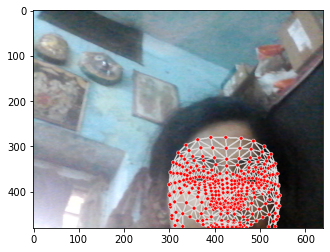

In [115]:
#last frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# **Extract Keypoint Values**

In [116]:
pose= []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [117]:
test

array([ 3.23699176e-01,  3.90616989e+00, -4.69407104e-02,  3.61524313e-03])

In [118]:
len(pose)

33

In [119]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) #for pose we have 4 landmarks x,y, z, visibility

In [120]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [121]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [122]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [123]:
face

array([ 0.67200619,  0.96879607, -0.06089344, ...,  0.79728681,
        0.76532322,  0.04710586])

In [124]:
len(results.pose_landmarks.landmark)

33

In [93]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) #for pose we have 4 landmarks x,y, z, visibility
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh, rh])
    

In [94]:
extract_keypoints(results).shape

(1662,)

# **Setup folders for collection**

In [95]:
#Path for exported data , numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions we are trying to detect
actions =np.array(['wicket','four','six'])

#30 videos worth of data for each action
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [96]:
#Folder structure in which way videos will be saved
# wicket
###  0
###  1
###  2
###........
###  29

# four

# six

In [97]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# **Collect Keypoint Values for Training an Testing**

In [98]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #loop through the actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                ret,frame=cap.read()
                image, results = mediapipe_detection(frame, holistic)

                #Draw landmarks
                draw_style_landmarks(image, results)
                
                #Apply collection logic with some break
                if frame_num==0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collection frames for {} Video Numer {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collection frames for {} Video Numer {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                cv2.imshow("Opencv Feed", image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

# **Preprocess data and Create Labels and Features**

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [100]:
label_map = {label: num for num, label in enumerate(actions)}

In [101]:
label_map

{'wicket': 0, 'four': 1, 'six': 2}

In [102]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [103]:
np.array(sequences).shape

(90, 30, 1662)

In [104]:
np.array(labels).shape

(90,)

In [105]:
X = np.array(sequences)

In [106]:
X.shape

(90, 30, 1662)

In [107]:
y = to_categorical(labels).astype(int)

In [108]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [110]:
x_train.shape

(85, 30, 1662)

In [111]:
y_train.shape

(85, 3)

In [112]:
x_test.shape

(5, 30, 1662)

In [113]:
y_test.shape

(5, 3)

# **Build and Train LSTM Neural Network**

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [115]:
import os
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [116]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [117]:
X.shape #

(90, 30, 1662)

In [118]:
res = [.7, 0.2, 0.1]

In [119]:
actions[np.argmax(res)]

'wicket'

In [120]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics = ['categorical_accuracy'])

In [121]:
model.fit(x_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 7s 571ms/step - loss: 1.2095 - categorical_accuracy: 0.3210
Epoch 2/200
3/3 [==============================] - 1s 162ms/step - loss: 2.6637 - categorical_accuracy: 0.3347
Epoch 3/200
3/3 [==============================] - 1s 178ms/step - loss: 1.1609 - categorical_accuracy: 0.3268
Epoch 4/200
3/3 [==============================] - 1s 195ms/step - loss: 1.1162 - categorical_accuracy: 0.2505
Epoch 5/200
3/3 [==============================] - 1s 190ms/step - loss: 1.1075 - categorical_accuracy: 0.3933
Epoch 6/200
3/3 [==============================] - 0s 150ms/step - loss: 1.1578 - categorical_accuracy: 0.3405
Epoch 7/200
3/3 [==============================] - 0s 161ms/step - loss: 1.2724 - categorical_accuracy: 0.3484
Epoch 8/200
3/3 [==============================] - 0s 165ms/step - loss: 1.0672 - categorical_accuracy: 0.3718
Epoch 9/200
3/3 [==============================] - 0s 149ms/step - loss: 1.0474 - categorical_accuracy: 0.3601
E

KeyboardInterrupt: 

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# **Make Predictions**

In [123]:
res=model.predict(x_test)

In [124]:
actions[np.argmax(res[1])]

'wicket'

In [125]:
actions[np.argmax(y_test[1])]

'wicket'

# **Save Weights**

In [126]:
model.save('action.h5')

In [127]:
model.load_weights('action.h5')

# **Evaluation using Confusion Matrix and Accuracy** 

In [128]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [129]:
yhat = model.predict(x_test)

In [130]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [131]:
ytrue

[0, 0, 1, 1, 0]

In [132]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [133]:
accuracy_score(ytrue, yhat)

1.0

# **Test in Real Time**

In [134]:
colors =[(245,117,16), (117,245,16), (16,117,245)]
colors_copy =[(255,0,0), (0,255,0), (0,0,255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

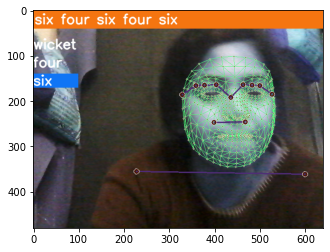

In [99]:
plt.imshow(prob_viz(res, actions, image, colors))

In [137]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        h, w, c = frame.shape
#         print(h, w, c)
        opImg = np.zeros([h, w, c]) 
        opImg.fill(0) 

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        # Draw landmarks
        draw_style_landmarks(image, results)
        draw_style_landmarks_copy(opImg, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            opImg = prob_viz(res, actions, opImg, colors_copy)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#         cv2.rectangle(opImg, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(opImg, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        cv2.imshow('Extracted Image', opImg)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [100]:
x_test[0].shape

(30, 1662)

In [101]:
np.expand_dims(x_test[0], axis=0).shape

(1, 30, 1662)

In [102]:
res[np.argmax(res)] > threshold

True